# K-means

## 1.首先仍旧导入标准程序包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## 2.构建数据

生成一组数据

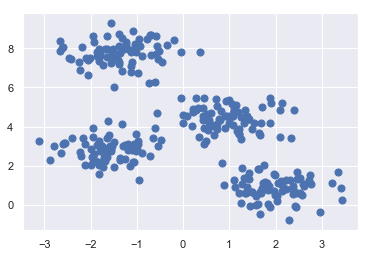

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

## 3.引入K-MEANS

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

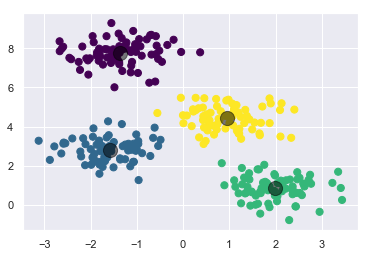

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## 4.k-means的只能确定线性聚类边界

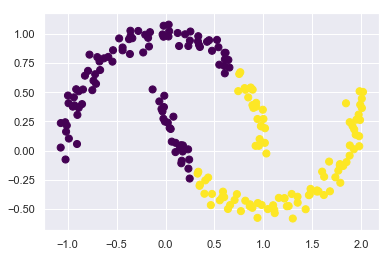

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

## 5.可参考支持向量机的高维处理

对于非线性聚类边界情况，可通过核方法，将数据映射到高维空间后再进行线性分离

具体而言，利用sklearn的SpectralClustering进行实现，它使用最近邻图来计算数据的高维表示，然后用kmeans分配标签

D:\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


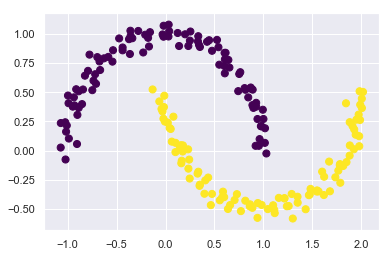

In [21]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis')

## 6.示例：色彩压缩

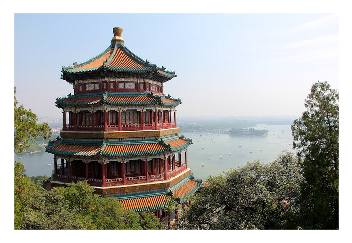

In [22]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [23]:
china.shape

(427, 640, 3)

In [27]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

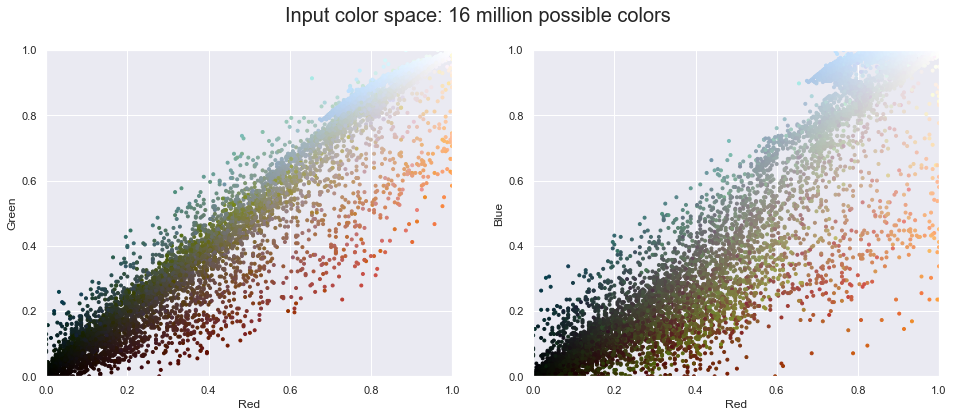

In [32]:
plot_pixels(data, title='Input color space: 16 million possible colors')

上侧两图是的像素点是从china.jpg的所有RGB像素中随机抽出的10000个，各像素点的rgb数值已经归一化

左图和右图分别是像素点R-G，和R-B的分布信息。

目前的每个像素点rgb数值虽是经过归一化，但像素空间仍是255x255x255=16 581 375，下面通过kmeans将其压缩

采用的是kmeans的子集MiniBatchKMeans，相较于标准KMeans速度更快

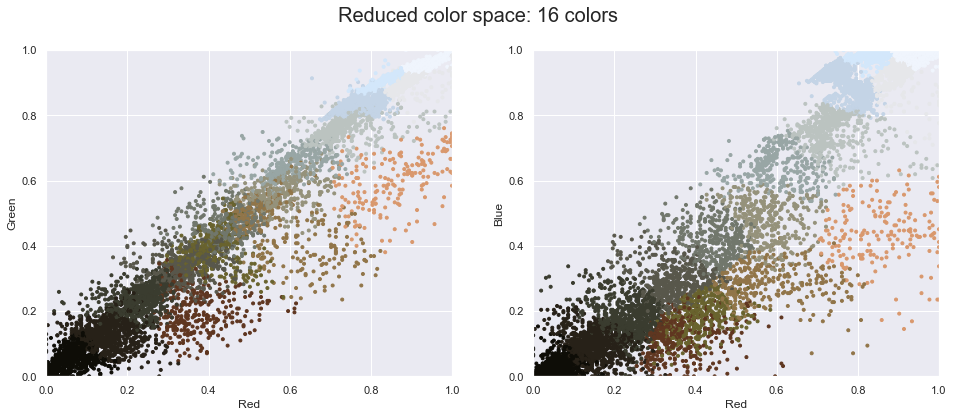

In [33]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

In [34]:
new_colors.shape

(273280, 3)

In [38]:
kmeans.cluster_centers_

array([[0.37310513, 0.21267083, 0.12549595],
       [0.82920903, 0.904546  , 0.98391612],
       [0.59591021, 0.64995123, 0.64583107],
       [0.15350731, 0.13106839, 0.09495134],
       [0.44506665, 0.46862385, 0.4232454 ],
       [0.90161823, 0.90617852, 0.91697265],
       [0.56810117, 0.45702688, 0.28643604],
       [0.76906432, 0.82994833, 0.90040978],
       [0.34679027, 0.34250377, 0.294306  ],
       [0.94171068, 0.96143791, 0.99034223],
       [0.05471044, 0.05106527, 0.02842771],
       [0.22805023, 0.23676417, 0.18538751],
       [0.41354657, 0.38863075, 0.17895804],
       [0.58488063, 0.57075486, 0.48377941],
       [0.73176265, 0.76413583, 0.75347138],
       [0.85019846, 0.59441137, 0.42930261]])

Text(0.5, 1.0, '16-color Image')

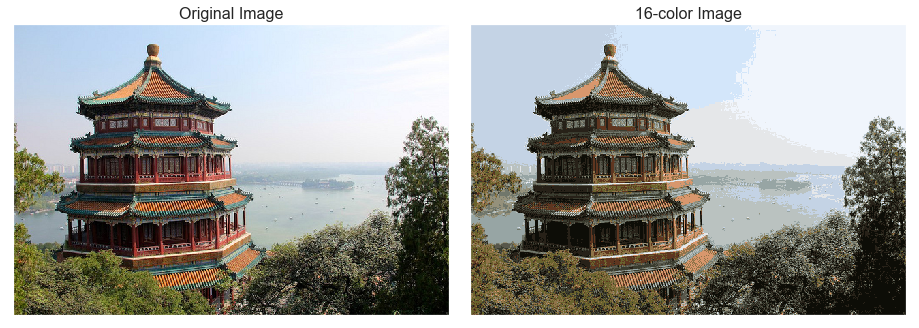

In [41]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)